In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

train = pd.read_csv("/content/drive/MyDrive/2018-2023 WPI/2022-2023 WPI Master's/Fall Semester/Machine Learning/CS 539 Final Project/Data Split/train_preprocessing.csv")
validate = pd.read_csv("/content/drive/MyDrive/2018-2023 WPI/2022-2023 WPI Master's/Fall Semester/Machine Learning/CS 539 Final Project/Data Split/valid_preprocessing.csv")
test = pd.read_csv("/content/drive/MyDrive/2018-2023 WPI/2022-2023 WPI Master's/Fall Semester/Machine Learning/CS 539 Final Project/Data Split/test_preprocessing.csv")

Mounted at /content/drive/


In [3]:
train = train[['text','target']]
validate = validate[['text','target']]
test = test[['text','target']]

In [ ]:
train.head()

,text,target
0,miss cut grass cut grass burn smell smell burn...,0.0
1,chang vote wont bat today co rain cricketsweep,1.0
2,ty link boost even tho didnt copi whole link t...,1.0
3,whatt feeel,0.0
4,circl triangl,0.0


In [ ]:
validate.head()

,text,target
0,dontyouh da shit wanna say long charact,0.0
1,omg ive alway want see wick alreadi do,0.0
2,finish sit fml,0.0
3,thank,1.0
4,know way get hot right,1.0


In [ ]:
test.head()

,text,target
0,alreadi miss go miss,0.0
1,feat awwwww video,1.0
2,feel everybodi stude dont know anyth hahaha,0.0
3,wanna still sleep cant,0.0
4,hate everyth ive design month ago befor,1.0


In [6]:
print(train.isna().sum())
print(validate.isna().sum())
print(test.isna().sum())

text      4101
target       0
dtype: int64
text      1398
target       0
dtype: int64
text      1354
target       0
dtype: int64


In [7]:
train = train.dropna()
validate = validate.dropna()
test = test.dropna()

In [ ]:
print(train.isna().sum())
print(validate.isna().sum())
print(test.isna().sum())

text      0
target    0
dtype: int64
text      0
target    0
dtype: int64
text      0
target    0
dtype: int64


In [8]:
train_x = train['text']
train_y = train['target']
validate_x = validate['text']
validate_y = validate['target']
test_x = test['text']
test_y = test['target']

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(ngram_range = (1,2), max_features = 500000)
tfidf_vect.fit(train_x)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [ ]:
import joblib
filename = "/content/drive/MyDrive/2018-2023 WPI/2022-2023 WPI Master's/Fall Semester/Machine Learning/CS 539 Final Project/Ensemble/RandomForest/tfidf_vect_RF_AdB.joblib"
joblib.dump(tfidf_vect, filename)

["/content/drive/MyDrive/2018-2023 WPI/2022-2023 WPI Master's/Fall Semester/Machine Learning/CS 539 Final Project/Ensemble/RandomForest/tfidf_vect_RF_AdB.joblib"]

In [10]:
train_x = tfidf_vect.transform(train_x)
validate_x = tfidf_vect.transform(validate_x)
test_x  = tfidf_vect.transform(test_x)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
def RF_Model(x1, y1, x2, y2, n, d):
    RF = RandomForestClassifier(n_estimators = n, max_depth = d, random_state = 0)
    RF.fit(x1, y1)
    y1_hat = RF.predict(x1)
    Acc_1 = RF.score(x1, y1)
    F1_1 = f1_score(y1, y1_hat)
    y2_hat = RF.predict(x2)
    Acc_2 = RF.score(x2, y2)
    F1_2 = f1_score(y2, y2_hat)
    return RF, y1_hat, y2_hat, Acc_1, F1_1, Acc_2, F1_2

In [ ]:
RF_1 = RF_Model(train_x, train_y, validate_x, validate_y, 100, 20)
RF_2 = RF_Model(train_x, train_y, validate_x, validate_y, 50, 20)
RF_3 = RF_Model(train_x, train_y, validate_x, validate_y, 50, 10)

In [ ]:
print(RF_1[0], RF_1[3], RF_1[4], RF_1[5], RF_1[6])
print(RF_2[0], RF_2[3], RF_2[4], RF_2[5], RF_2[6])
print(RF_3[0], RF_3[3], RF_3[4], RF_3[5], RF_3[6])

RandomForestClassifier(max_depth=20, random_state=0) 0.7378049354586624 0.7526351943529858 0.7303783403745111 0.7464791226434028
RandomForestClassifier(max_depth=20, n_estimators=50, random_state=0) 0.7224068651604406 0.7381336554469673 0.716068951230689 0.7329777405195749
RandomForestClassifier(max_depth=10, n_estimators=50, random_state=0) 0.6896387589065371 0.7204764471110542 0.6863076816843585 0.718070956876927


In [ ]:
RF_0 = RF_Model(train_x, train_y, validate_x, validate_y, 500, 20)

In [ ]:
print(RF_0[0], RF_0[3], RF_0[4], RF_0[5], RF_0[6])

RandomForestClassifier(max_depth=20, n_estimators=500, random_state=0) 0.7564240573533396 0.767515656452695 0.7494930979717641 0.7618348492444317


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import joblib
filename = "/content/drive/MyDrive/2018-2023 WPI/2022-2023 WPI Master's/Fall Semester/Machine Learning/CS 539 Final Project/Ensemble/RandomForest/RF.joblib"
joblib.dump(RF_0[0], filename)

["/content/drive/MyDrive/2018-2023 WPI/2022-2023 WPI Master's/Fall Semester/Machine Learning/CS 539 Final Project/Ensemble/RandomForest/RF.joblib"]

In [ ]:
# Most accurate random forest model has 100 estimator, and max_depth 20
RF_Model_Selected = RF_0[0]
RF_Pred = RF_Model_Selected.predict(test_x)

In [ ]:
RF_Accuracy = accuracy_score(test_y, RF_Pred)
RF_Precision = precision_score(test_y, RF_Pred)
RF_Recall = recall_score(test_y, RF_Pred)
RF_F1 = f1_score(test_y, RF_Pred)
print(RF_Accuracy, RF_Precision, RF_Recall, RF_F1)

0.7485642374296241 0.7244187365317001 0.8020745038206283 0.7612713679988796


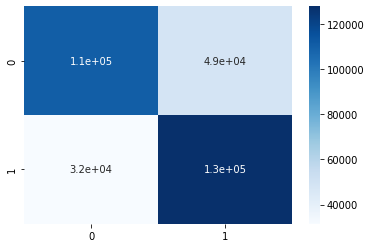

In [ ]:
sns.heatmap(confusion_matrix(test_y, RF_Pred), annot = True, cmap='Blues')

In [ ]:
from sklearn import metrics

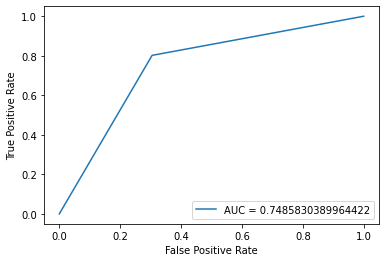

In [ ]:
fpr, tpr, _ = metrics.roc_curve(test_y,  RF_Pred)
auc = metrics.roc_auc_score(test_y,  RF_Pred)
plt.plot(fpr, tpr, label = "AUC = "+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
#print(RF_0[0], RF_0[3], RF_0[4], RF_0[5], RF_0[6])

In [ ]:
def AdB_Model(x1, y1, x2, y2, n, alpha):
    AdB = AdaBoostClassifier(n_estimators = n, learning_rate = alpha, random_state = 0)
    AdB.fit(x1, y1)
    y1_hat = AdB.predict(x1)
    Acc_1 = AdB.score(x1, y1)
    F1_1 = f1_score(y1, y1_hat)
    y2_hat = AdB.predict(x2)
    Acc_2 = AdB.score(x2, y2)
    F1_2 = f1_score(y2, y2_hat)
    return AdB, y1_hat, y2_hat, Acc_1, F1_1, Acc_2, F1_2

In [ ]:
AdB_1 = AdB_Model(train_x, train_y, validate_x, validate_y, 50, 1)
AdB_2 = AdB_Model(train_x, train_y, validate_x, validate_y, 50, 0.5)
AdB_3 = AdB_Model(train_x, train_y, validate_x, validate_y, 100, 0.5)

In [ ]:
print(AdB_1[0], AdB_1[3], AdB_1[4], AdB_1[5], AdB_1[6])
print(AdB_2[0], AdB_2[3], AdB_2[4], AdB_2[5], AdB_2[6])
print(AdB_3[0], AdB_3[3], AdB_3[4], AdB_3[5], AdB_3[6])

AdaBoostClassifier(learning_rate=1, random_state=0) 0.692061609019363 0.7326113536483229 0.6919196991858181 0.7323193895611244
AdaBoostClassifier(learning_rate=0.5, random_state=0) 0.6872347392350029 0.7286764158700139 0.686998198379169 0.7285156196828422
AdaBoostClassifier(learning_rate=0.5, n_estimators=100, random_state=0) 0.7086491355258244 0.7381318639987965 0.7074908506537938 0.7371559115523466


In [ ]:
AdB_0 = AdB_Model(train_x, train_y, validate_x, validate_y, 500, 0.5)

In [ ]:
print(AdB_0[0], AdB_0[3], AdB_0[4], AdB_0[5], AdB_0[6])

AdaBoostClassifier(learning_rate=0.5, n_estimators=500, random_state=0) 0.752894395746831 0.7667878433641442 0.751486180249967 0.7647791044155352


In [ ]:
import joblib

In [ ]:
filename = "/content/drive/MyDrive/2018-2023 WPI/2022-2023 WPI Master's/Fall Semester/Machine Learning/CS 539 Final Project/Ensemble/AdaBoost/AdB.joblib"
joblib.dump(AdB_0[0], filename)

["/content/drive/MyDrive/2018-2023 WPI/2022-2023 WPI Master's/Fall Semester/Machine Learning/CS 539 Final Project/Ensemble/AdaBoost/AdB0.joblib"]

In [ ]:
# Most accurate adaboost model has 100 estimator, and learning rate 0.5
AdB_Model_Selected = AdB_0[0]
AdB_Pred = AdB_Model_Selected.predict(test_x)

In [ ]:
AdB_Accuracy = accuracy_score(test_y, AdB_Pred)
AdB_Precision = precision_score(test_y, AdB_Pred)
AdB_Recall = recall_score(test_y, AdB_Pred)
AdB_F1 = f1_score(test_y, AdB_Pred)
print(AdB_Accuracy, AdB_Precision, AdB_Recall, AdB_F1)

0.7510874136188749 0.7243045190829415 0.8105068846653732 0.7649849328422555


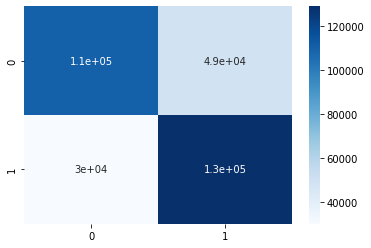

In [ ]:
sns.heatmap(confusion_matrix(test_y, AdB_Pred), annot = True, cmap='Blues')

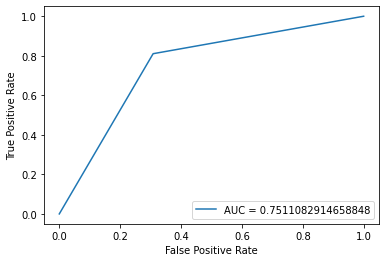

In [ ]:
fpr, tpr, _ = metrics.roc_curve(test_y,  AdB_Pred)
auc = metrics.roc_auc_score(test_y,  AdB_Pred)
plt.plot(fpr, tpr, label = "AUC = "+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
# Maybe explore word to vect

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
def model_Evaluate(model):
  # Predict values for Test dataset
  model = joblib.load(model)
  pred_y = model.predict(test_x)
  # Print the evaluation metrics for the dataset.
  print(classification_report(test_y, pred_y))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(test_y, pred_y)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [19]:
AdaBoost = "/content/drive/MyDrive/2018-2023 WPI/2022-2023 WPI Master's/Fall Semester/Machine Learning/CS 539 Final Project/Ensemble/AdaBoost/AdB.joblib"
RandForest = "/content/drive/MyDrive/2018-2023 WPI/2022-2023 WPI Master's/Fall Semester/Machine Learning/CS 539 Final Project/Ensemble/RandomForest/RF.joblib"

In [16]:
RandForest

"/content/drive/MyDrive/2018-2023 WPI/2022-2023 WPI Master's/Fall Semester/Machine Learning/CS 539 Final Project/Ensemble/RandomForest/RF.joblib"

In [24]:
import joblib

              precision    recall  f1-score   support

         0.0       0.78      0.70      0.73    159379
         1.0       0.72      0.80      0.76    159267

    accuracy                           0.75    318646
   macro avg       0.75      0.75      0.75    318646
weighted avg       0.75      0.75      0.75    318646



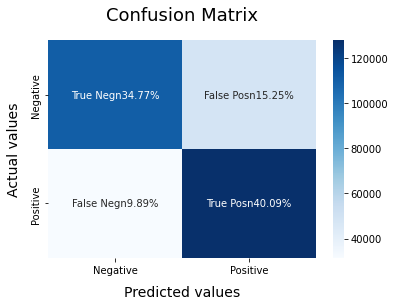

In [25]:
model_Evaluate(RandForest)

              precision    recall  f1-score   support

         0.0       0.79      0.69      0.74    159379
         1.0       0.72      0.81      0.76    159267

    accuracy                           0.75    318646
   macro avg       0.75      0.75      0.75    318646
weighted avg       0.75      0.75      0.75    318646



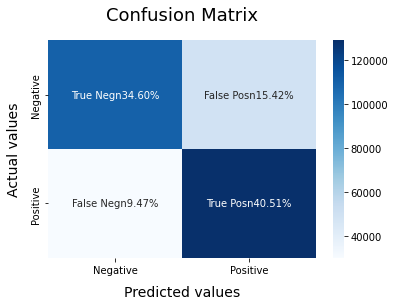

In [26]:
model_Evaluate(AdaBoost)